
***
# R2.09 
## TP2. A siege of herons
***
***
Le but de ce TP est d'effectuer une étude complète d'une suite définie par récurrence, et en particulier les suites de Héron
***
***


In [1]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt

#magic
import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rcParams['figure.figsize'] = (15, 10)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

## Présentation d'une suite $u_{n+1} = f(u_n)$ "jouet"


Soit $f : \mathbb{R} \to \mathbb{R} \:  x \mapsto -\frac{x^2}{4}  + x +\frac12  $,

et $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 1, u_{n+1} = f(u_n)$

**question 1**
Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures


In [17]:
def f(x): 
    return (-(x**2/4)+x+1/2)


print(f(2))

def un(n):
    if n==0:
        return 1
    else:
        return f(un(n-1))

1.5


[1, 1.25, 1.359375, 1.39739990234375, 1.4092182805761695, 1.4127442399986556, 1.4137826680863108, 1.414087309940999, 1.414176579906956, 1.4142027301176223]


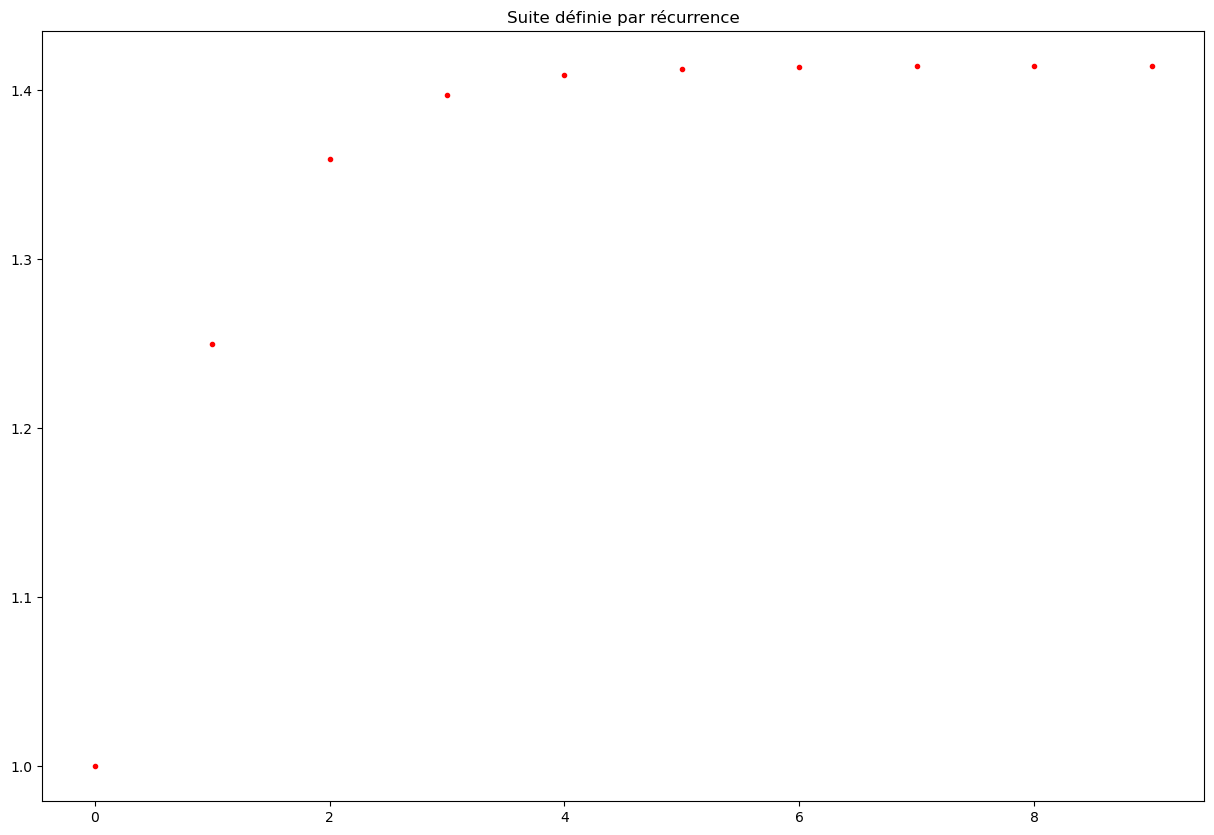

In [18]:
rg = range(0, 10)
s1 = [un(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite définie par récurrence')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

###### <tt> fonctions utiles </tt>

on se donne deux petites fonctions utiles pour visualiser les suites définie par récurrence.

 - <tt>subdivision</tt> permet de couper un intervalle $[a,b]$ en $n$ morceaux de tailles égales (à noter de numpy possède une fonction <tt>np.linespace</tt> faisant cela)
 - <tt>escalier</tt> trace $(u_n)$ selon le "diagramme escargot"

In [19]:
def subdivision(a, b, n):
    d = (b - a) / n
    return [a + k * d for k in range(n + 1)]


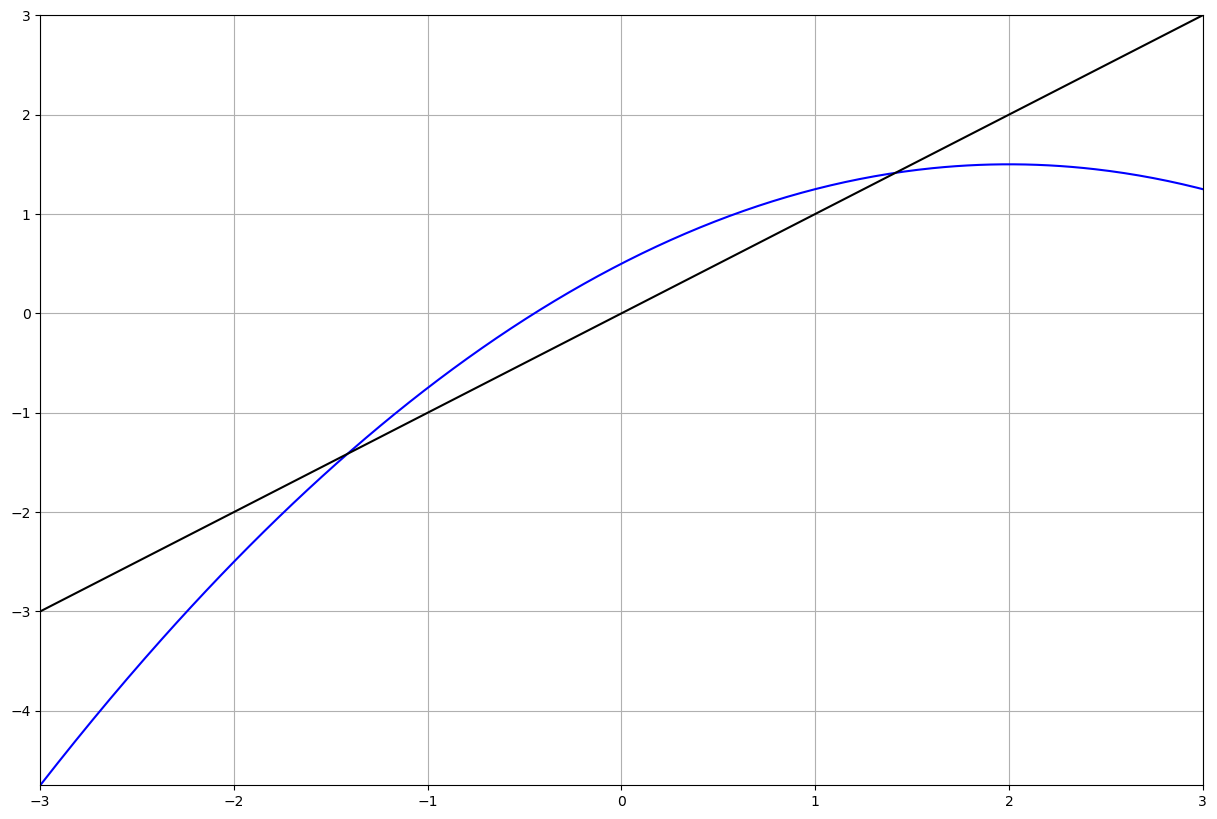

In [20]:
a=-3
b=3
xs = subdivision(a,b, 400)
plt.axis([a, b, min(a,f(a),f(b)), max(b,f(b),f(a))])
plt.plot(xs, [f(x) for x in xs], 'b')
plt.plot(xs, xs, 'k')
plt.grid()
plt.show()

In [21]:
def escalier(f, a, b, c, d, x0, n):
    xs = subdivision(a, b, 200)
    ys = [f(x) for x in xs]
    pad = 0.
    plt.axis([a - pad, b + pad, c - pad, d + pad])
    plt.plot(xs, ys, 'b')
    plt.plot(xs, xs, 'k')
    x = x0
    coul = 'r'
    plt.plot([x0, x0], [0, f(x0)], coul)
    for k in range(n):
        plt.plot([x, f(x)], [f(x), f(x)], coul)
        plt.plot([f(x), f(x)], [f(x), f(f(x))], coul)
        x = f(x)
    plt.grid()


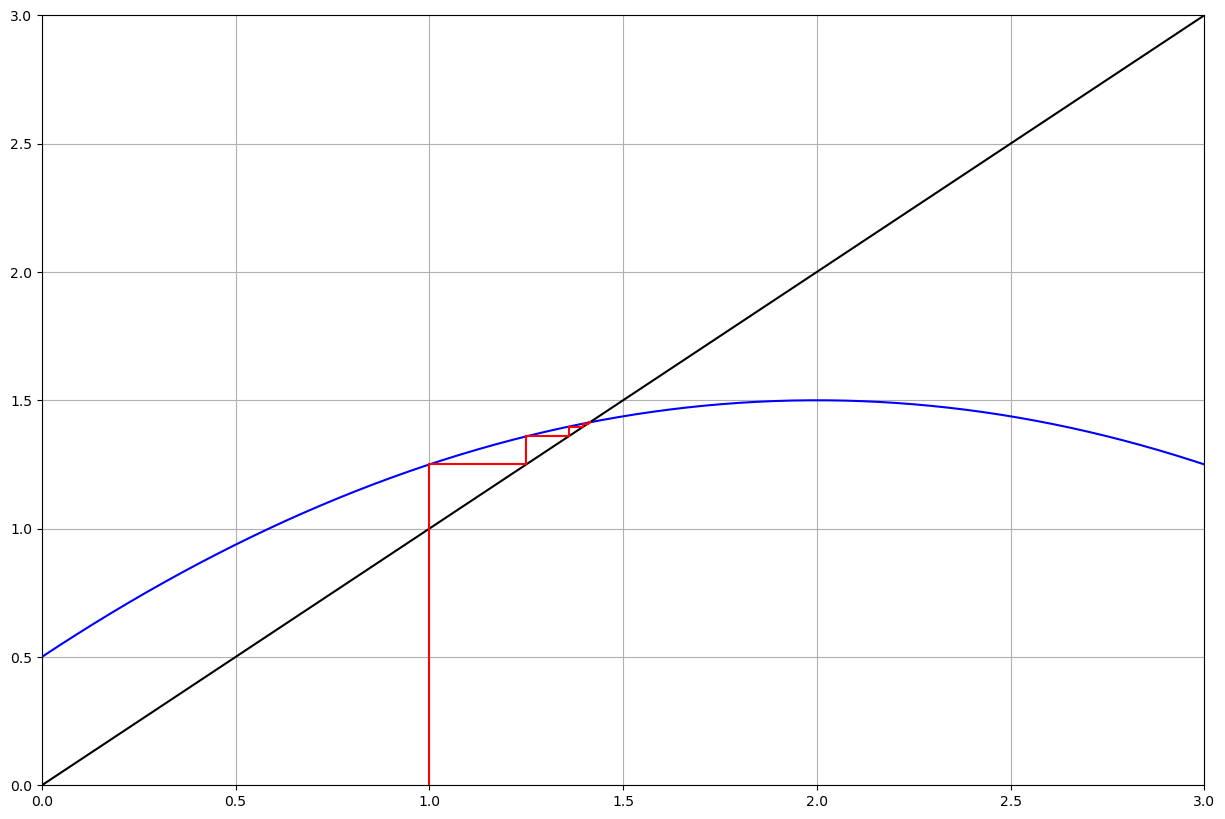

In [22]:

escalier(f, 0, 3, 0, 3, 1, 50)


**question 2** 

 - Montrer que $f$ est une fonction croissante sur $[0,2]$
 - En déduire que la suite $(u_n)_n$ est croissante



Soit $f : \mathbb{R} \to \mathbb{R} \:  x \mapsto -\frac{x^2}{4}  + x +\frac12  $,

On calcule f'(x) = -x/2 + 1
f'(x) > 0 <=> -x/2 + 1 > 0 <=> -x/2 > -1 <=> -x > -2 <=> x < 2 
f(x) est donc croissant quand x est inférieur à 2 et un+1 = f(un) donc (un)n est croissant




**question 3**

 - Trouver un intervalle $I$ stable par $f$
 - En déduire que la suite $(u_n)_n$ est bornée




L'intervalle I stable par f est [0,2]

f(0) = 0,5 et f(2) = 1,5

La suite est donc 0<=un<=2


**question 4**

 - En déduire que la suite $(u_n)_n$ convergente
 
 La suite est majorée et croissante donc elle est convergente.
 
 - Quelle est sa limite $\ell$ ?
 
 Racine de 2
 

On cherche la solution de $f(\ell) = \ell$, donc $\ell$ est une racine de $g : x \mapsto -\frac{x^2}{4} +x - \frac12 -x  = -\frac{x^2}{4}- \frac12 $

$\Delta = b^2 -4ac = \frac12$

$\ell_- = -\sqrt{2} \approx -1.414$


$\ell_+ = \sqrt{2} \approx 1.414$

$(u_n)_n$ étant croissante, majorée par $2$, elle converge forcément vers $\ell_+$


In [23]:
print(np.sqrt(2))


1.4142135623730951


## Suite de Héron $u_{n+1} = f(u_n)$


Soit $f : \mathbb{R} \to \mathbb{R} \quad  x \mapsto \frac{x + \frac{2}{x}}{2}    $,


la suite de Héron est définie par : $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 2, u_{n+1} = f(u_n)$

**question 1**
Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures


In [24]:
def g(x):
    return (x+2/x)/2

def hn(n):
    if n==0:
        return 2
    else:
        return g(hn(n-1))


[2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095]


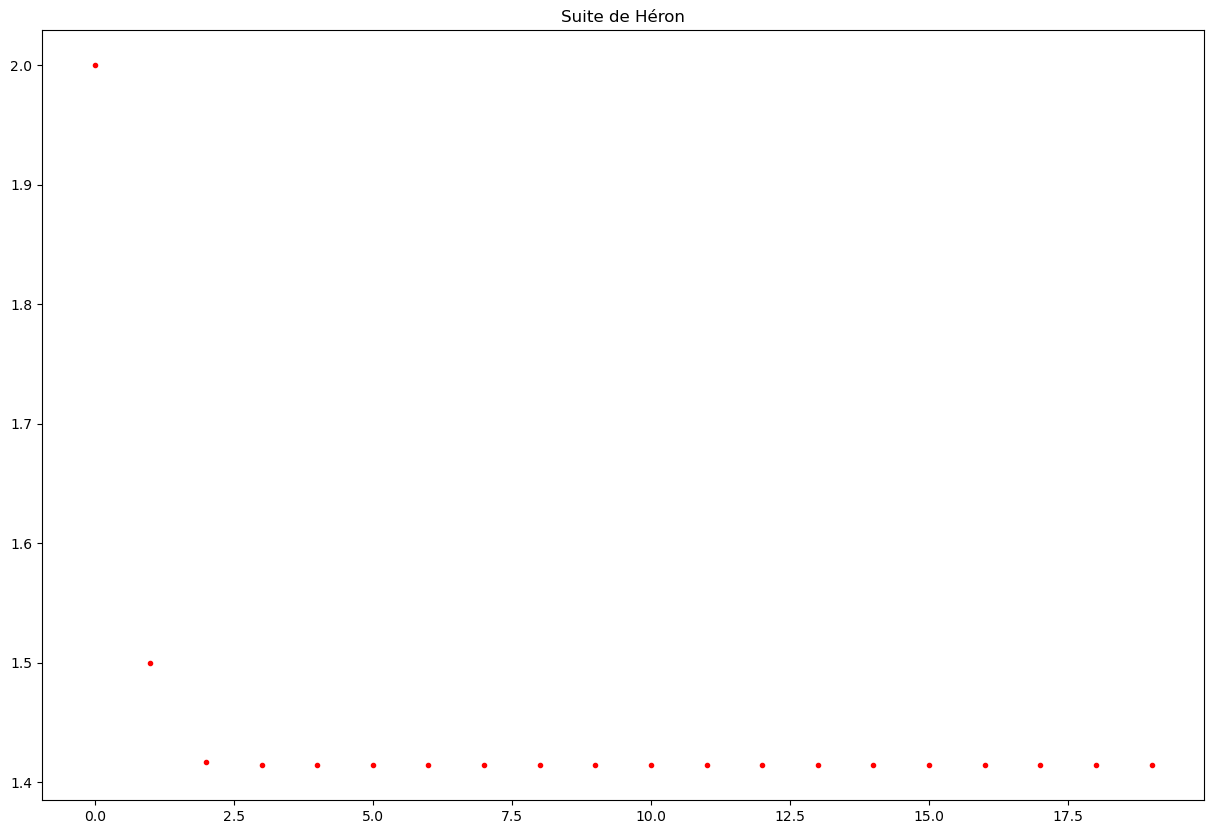

In [25]:
rg = range(0, 20)
s1 = [hn(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite de Héron')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

1.4375

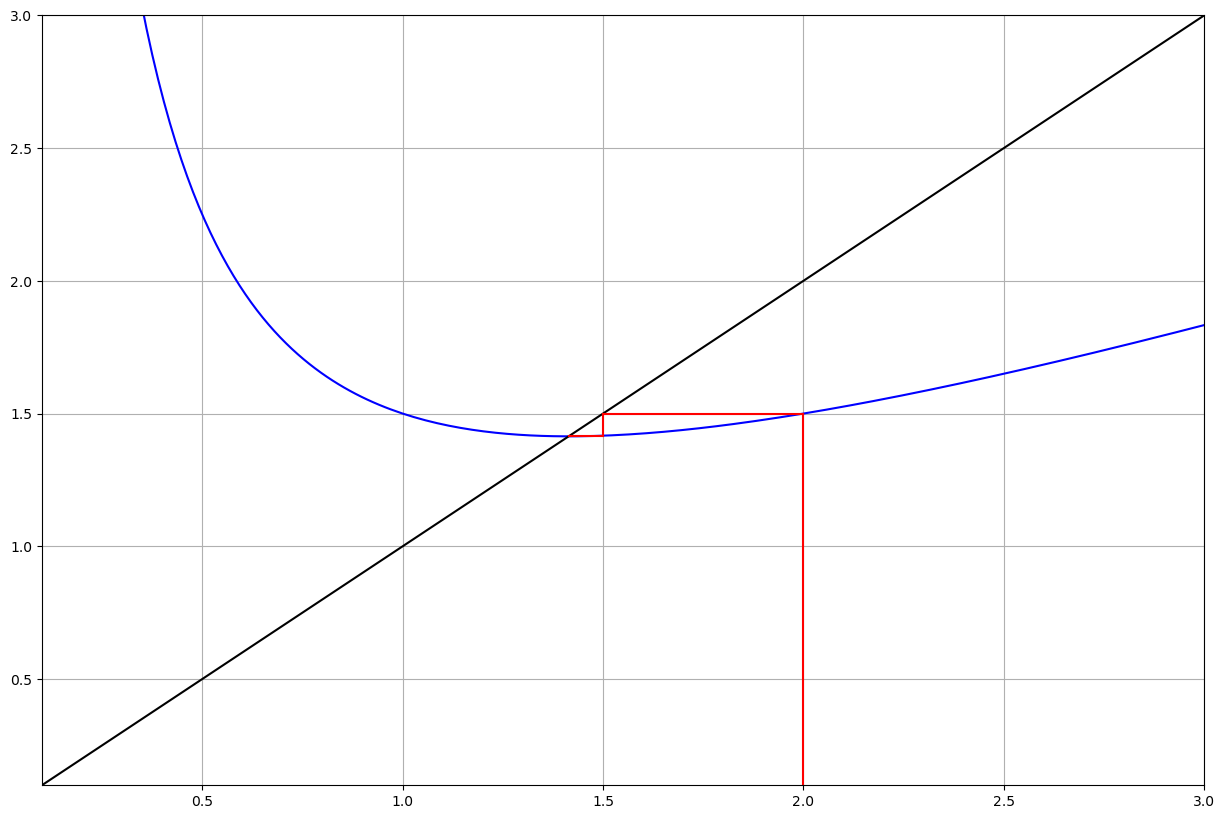

In [26]:
escalier(g, 0.1, 3, 0.1, 3, 2, 50)
f(1.5)

**question 2** 

 - Étudier les variation de $f$
 - Trouver un intervalle $I$ stable par $f$



$f'(x) = \frac{1-\frac{2}{x^2}}{2}$ donc décroissante sur $]0,\sqrt{2}]$ et croissante sur $[\sqrt{2},+\infty[$

### suites de Héron


Conjecturer (et prouver) les limites en fonction de $A \in \mathbb{N}$ des suites $(h[A]_n)_n$ définies par 

$$ h[A]_0 = A ; h[A]_{n+1} \frac{h[A]_{n} + \frac{A}{h[A]_{n}}}{2} $$ 

In [31]:
def Heron(n,a):
    if n==0:
        return a
    else:
        return (Heron(n-1,a)+a/Heron(n-1,a))/2

[2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095]


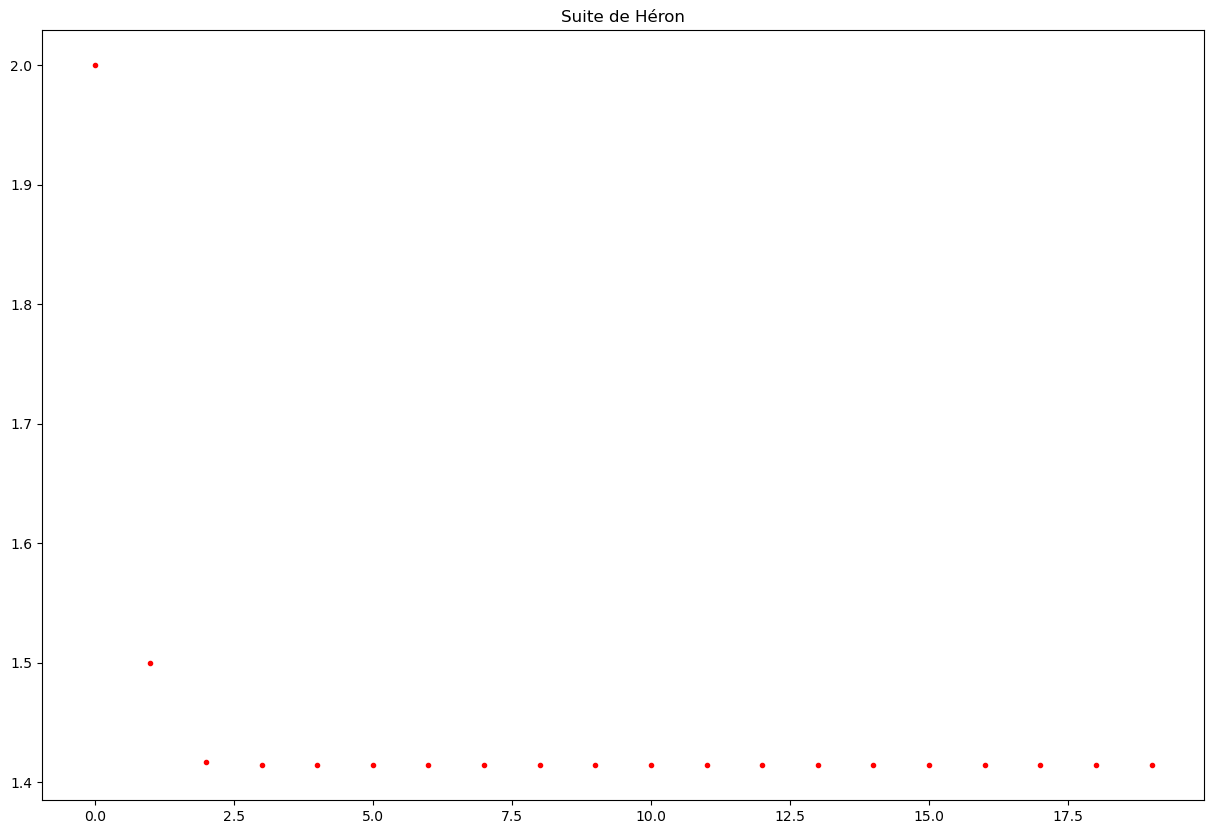

In [48]:
rg = range(0, 20)
s1 = [Heron(n,2) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite de Héron')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

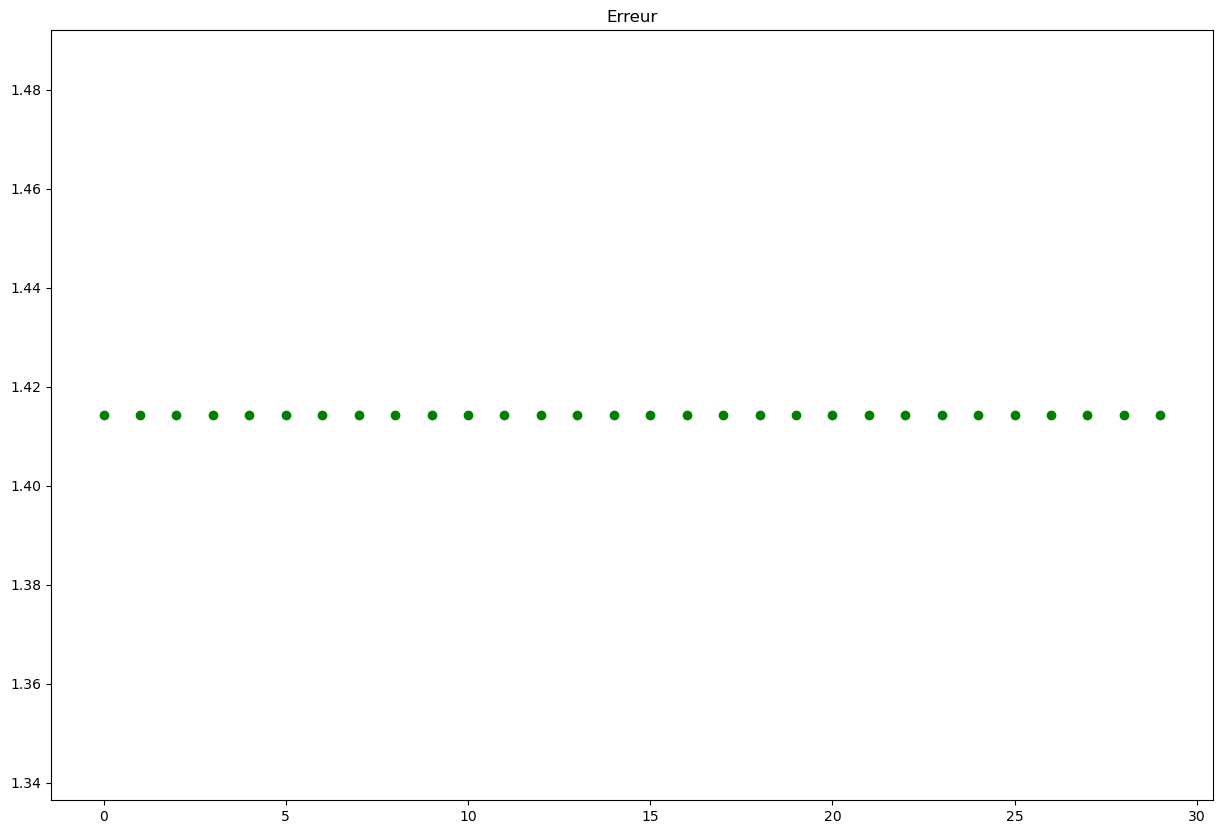

In [30]:
rg = range(0,30)
s1 = [np.abs(np.sqrt(2) ) for n in rg]
s2 = [np.abs(np.sqrt(2) ) for n in rg] 
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.plot(rg, s1, 'ro', markersize=3)
plt.plot(rg, s2, 'go')

plt.show()

*****
*****



## Point fixe et vitesse de convergence

**question 1** 

Écrire un programme <tt>contract_test</tt> qui teste empiriquement si une fonction $f$ est contractante sur un intervalle $[a,b]$ en vérifiant si $|f(x) - f(y)| < |x-y|$ pour de nombreuses valeurs $x,y \in [a,b]$.


In [18]:
def contract_test(f,a,b,k=1000):

    return 1
contract_test(f,1,2)


0.49974999999996506

**question 1 bis** 

Écrire un programme <tt>contract_test_deriv</tt> qui teste empiriquement si une fonction $f$ est contractante sur un intervalle $[a,b]$, en calculant une approximation de $f'(x)$ (voir TP2) et en calculant le maximum de cette appreoximation pour de nombreuses valeurs $x \in [a,b]$.

Quelle méthode vous semble la plus efficace entre <tt>contract_test</tt> et <tt>contract_test_deriv</tt>


In [19]:
def contract_test_deriv(f,a,b,k=1000,eps =10**-5):
   

    return 1
contract_test_deriv(f,1,2)

(0.5000000000032756, 1.0)

**question 2** 

En utilisant l'inégalité des accroissement finis, montrer que $f$ est contractante.


$f'(x) = \frac{1-\frac{2}{x^2}}{2}$  donc $0 \leq f'(x) \leq 0.5$ donc la fonction est contractante avec facteur de contraction $K= .5$

**question 3**



Tracer la différence $d_n = \ell -u_n$. Combien d'itérations sont nécessaires pour que cette différence soit inférieure à $10^{-4}$


$d_n \leq K^n |\ell -u_0|$

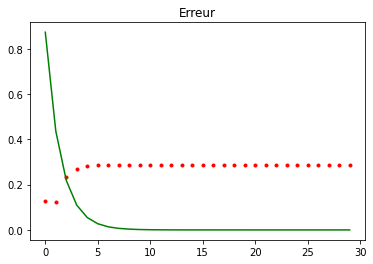

In [20]:
rg = range(0,30)
s1 = [np.abs(5-np.sqrt(15) -un(n)) for n in rg]
s2 = [np.abs(5-np.sqrt(15) -2)*.5**n for n in rg] 
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.plot(rg, s1, 'ro', markersize=3)
plt.plot(rg, s2, 'g')

plt.show()